# 02_Data Wrangling_Hospital Length Of Stay

## Project Overview

The goal of this project is creating a model that predicts the length-of-stay for each patient at the time of admission,
also identify factors are associated with length of hospital stay based on health records, in order to manage hospital stay more efficiently.

The inputs to the prediction model will include features such as patient’s diagnosis category, and continuous laboratory measurements.

#  Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import missingno as msno
from scipy import stats
from matplotlib.legend import Legend
from pylab import rcParams

In [2]:
%matplotlib inline
#rcParams['figure.figsize']=10,8
sns.set()
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")

# Dataset

LengthOfStay.csv
The LengthOfStay.csv file contains the following patient information.


https://microsoft.github.io/r-server-hospital-length-of-stay/index.html

https://github.com/microsoft/r-server-hospital-length-of-stay/tree/master/Data

https://github.com/microsoft/r-server-hospital-length-of-stay/blob/master/Python/Hospital_Length_Of_Stay_Notebook.ipynb

In [3]:
#df=pd.read_csv('LengthOfStay.csv')
df=pd.read_csv('LengthOfStay_new.csv') # it contains LOS

In [4]:
df.shape

(100000, 29)

In [5]:
df.head()

,eid,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid,lengthofstay,LOS
0,1,8/29/2012,0,F,0,0,0,0,0,0,...,12.0,1.390722,30.432418,96,6.5,4,9/1/2012,B,3,1-3
1,2,5/26/2012,5+,F,0,0,0,0,0,0,...,8.0,0.943164,28.460516,61,6.5,1,6/2/2012,A,7,4-7
2,3,9/22/2012,1,F,0,0,0,0,0,0,...,12.0,1.065750,28.843812,64,6.5,2,9/25/2012,B,3,1-3
3,4,8/9/2012,0,F,0,0,0,0,0,0,...,12.0,0.906862,27.959007,76,6.5,1,8/10/2012,A,1,1-3
4,5,12/20/2012,0,F,0,0,0,1,0,1,...,11.5,1.242854,30.258927,67,5.6,2,12/24/2012,E,4,4-7


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   eid                         100000 non-null  int64  
 1   vdate                       100000 non-null  object 
 2   rcount                      100000 non-null  object 
 3   gender                      100000 non-null  object 
 4   dialysisrenalendstage       100000 non-null  int64  
 5   asthma                      100000 non-null  int64  
 6   irondef                     100000 non-null  int64  
 7   pneum                       100000 non-null  int64  
 8   substancedependence         100000 non-null  int64  
 9   psychologicaldisordermajor  100000 non-null  int64  
 10  depress                     100000 non-null  int64  
 11  psychother                  100000 non-null  int64  
 12  fibrosisandother            100000 non-null  int64  
 13  malnutrition   

# Features

## 1. LengthofStay ( Target Feature )

Length of stay for the encounter

In [7]:
df.lengthofstay.value_counts(normalize=True)

1     0.17979
3     0.16068
4     0.14822
2     0.12825
5     0.12116
6     0.10362
7     0.07263
8     0.04652
9     0.02184
10    0.01000
11    0.00460
12    0.00137
13    0.00075
14    0.00031
15    0.00016
16    0.00006
17    0.00004
Name: lengthofstay, dtype: float64

Text(0.5, 1.0, 'length of stay (days at Hospital)')

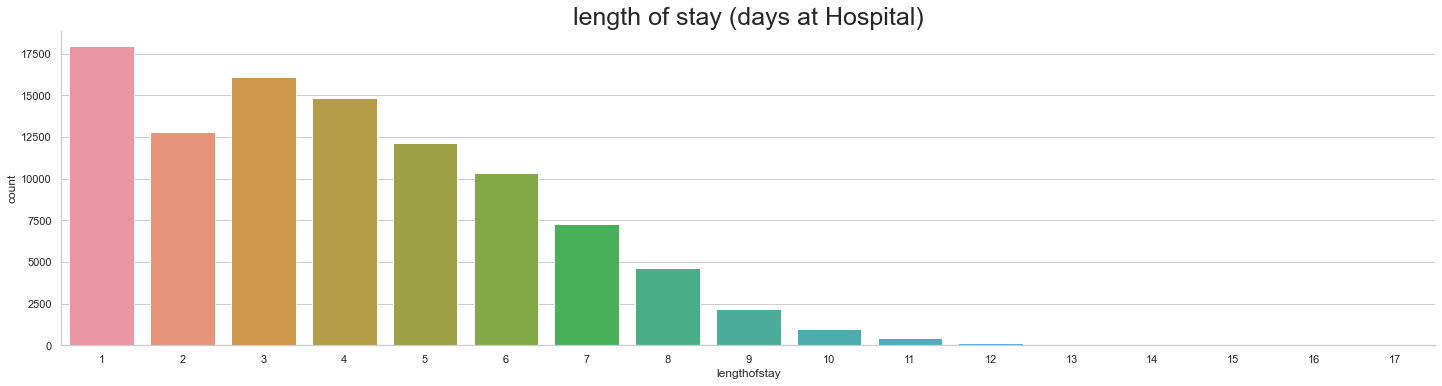

In [8]:
pl = sns.factorplot('lengthofstay',data=df, aspect=4, kind='count')
pl.set_xticklabels()
plt.title('length of stay (days at Hospital)', size=25)

so here 1-5 merged into short_stay level, 6-11  merged into  medium stay and 12-17  merged into high_stay.

In [9]:
#LOS = pd.Series([]) 
 
#running a for loop and asigning some values to series 

#for i in range(len(df)): 
    
#    if df["lengthofstay"][i] >= 1 and df["lengthofstay"][i]<= 3: 
#         LOS[i]="1-3"
            
#    elif df["lengthofstay"][i] > 3 and df["lengthofstay"][i]<= 7 :
#        LOS[i]="4-7"
    
#   elif df["lengthofstay"][i] > 7 and df["lengthofstay"][i]<= 11 :
#        LOS[i]="8-11"        
    
#    elif df["lengthofstay"][i] > 11 and df["lengthofstay"][i]<= 15 :
#        LOS[i]="12-15"        
    
#    elif df["lengthofstay"][i] > 15 and df["lengthofstay"][i]<= 18 :
#        LOS[i]="15-18"       
    
#df.insert(28, "LOS", LOS) 

#df.to_csv (r'LengthOfStay_new.csv', index = False, header=True)

In [10]:
df.LOS.value_counts(ascending=False, normalize=True)

1-3      0.46872
4-7      0.44563
8-11     0.08296
12-15    0.00259
15-18    0.00010
Name: LOS, dtype: float64

Text(0.5, 1.0, 'Days (LOS)')

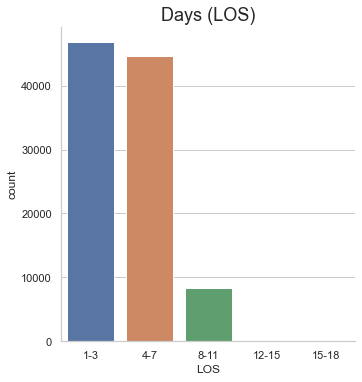

In [11]:
sns.factorplot('LOS',data=df,kind='count')
plt.title('Days (LOS)', size=18)

## 2. Gender

In [12]:
df.gender.value_counts(normalize=True)

F    0.57643
M    0.42357
Name: gender, dtype: float64

Text(0.5, 1.0, 'Gender')

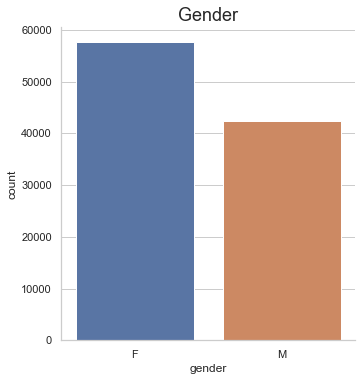

In [13]:
sns.factorplot('gender',data=df,kind='count')
plt.title('Gender', size=18)

## 3. Facility

###  facid

Facility ID at which the encounter occurred.

In [14]:
df.facid.value_counts( normalize=True)

E    0.30755
A    0.30035
B    0.30012
C    0.04699
D    0.04499
Name: facid, dtype: float64

In [15]:
df.reset_index()
df.set_index('facid')
fac_data= {'Id':['C','E','A','B','D'],
           'Name':['General Medicine 3 South','Behavioral 1 East','General Medicine 3 West','Pulmonary 2 West','Geriatrics 2 East'],
           'Capacity':[30,95,75,80,100]}
facility=pd.DataFrame(fac_data)

In [16]:
facility.reset_index()
facility.set_index('Id')
df=pd.merge(df, facility, left_on='facid', right_on='Id')

In [17]:
#sns.factorplot('facid',data=df,kind='count' )

Text(0.5, 1.0, 'Facility')

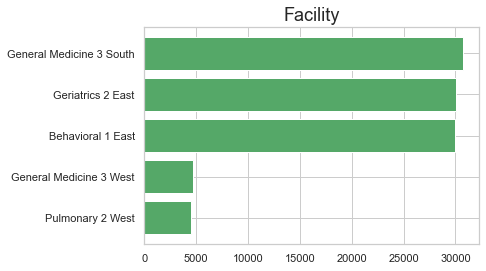

In [18]:
plt.subplots(figsize=(6,4))
fac1 = df.groupby('Name')['Name'].count()
y_pos=df['Name'].unique()
plt.barh(y_pos, sorted(fac1),  color=['C02'] ) 
plt.title('Facility', size=18)


###  LengthofStay vs gender

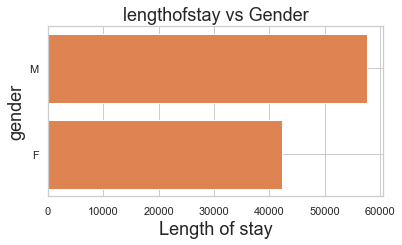

In [19]:
plt.subplots(figsize=(6,4))
g = df.groupby('gender')['lengthofstay'].count()
g1=df['gender'].unique()
plt.barh(g1, sorted(g), color=['C01']) 
plt.subplots_adjust(bottom=0.4, top=0.99)
plt.title('lengthofstay vs Gender', size=18)
plt.xlabel('Length of stay', size=18)
plt.ylabel('gender', size=18)
plt.show()

###  LengthofStay vs Facility

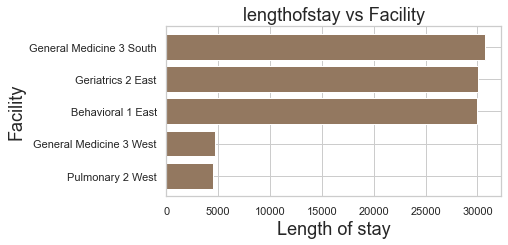

In [20]:
plt.subplots(figsize=(6,4))
fac = df.groupby('facid')['lengthofstay'].count()
y_pos=df['Name'].unique()
plt.barh(y_pos, sorted(fac),color=['C05']) 
#plt.yticks(y_pos, bars)
plt.subplots_adjust(bottom=0.4, top=0.99)
plt.title('lengthofstay vs Facility', size=18)
plt.xlabel('Length of stay', size=18)
plt.ylabel('Facility', size=18)
plt.show()

#  Feature Engineering

In this step, we design new features:

   1. The **continuous laboratory measurements** (hematocrit, neutrophils, sodium, glucose, bloodureanitro, creatinine, bmi, pulse, respiration).
   
    
   2. The  **number of issues** : the total number of preidentified medical conditions( hemo, dialysisrenalendstage, asthma, irondef, pneum, substancedependence, psychologicaldisordermajor, depress, psychother, fibrosisandother, malnutrition)

## lab_measurements ( Numerical Featues )

In [21]:
lab_measurements=df[["hematocrit", "neutrophils", "sodium", "glucose", "bloodureanitro", "creatinine", "bmi", "pulse", "respiration","secondarydiagnosisnonicd9","lengthofstay","LOS"]]
lab_measurements

,hematocrit,neutrophils,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,lengthofstay,LOS
0,11.5,14.2,140.361132,192.476918,12.0,1.390722,30.432418,96,6.5,4,3,1-3
1,8.4,8.9,133.058514,130.530524,12.0,1.065750,28.843812,64,6.5,2,3,1-3
2,14.8,17.8,136.593064,120.265259,11.0,0.884663,27.875940,83,6.1,1,6,4-7
3,12.2,9.1,140.060831,121.899082,7.0,1.254258,30.325155,73,6.5,1,1,1-3
4,8.9,13.1,138.068706,162.993649,10.0,1.015645,32.052032,66,5.5,0,6,4-7
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,11.6,6.3,140.943165,109.856668,23.0,1.654858,27.996657,80,6.5,1,3,1-3
99996,11.1,9.5,131.562027,154.377369,23.0,1.029836,31.192089,70,6.7,1,6,4-7
99997,10.9,5.9,142.565761,155.425660,18.0,1.087694,28.470080,75,6.7,2,3,1-3
99998,11.0,9.9,139.661356,198.920833,42.0,1.228341,29.929659,90,5.5,1,5,4-7


##  Correlation Heatmap of Diagnoses feartures

<AxesSubplot:>

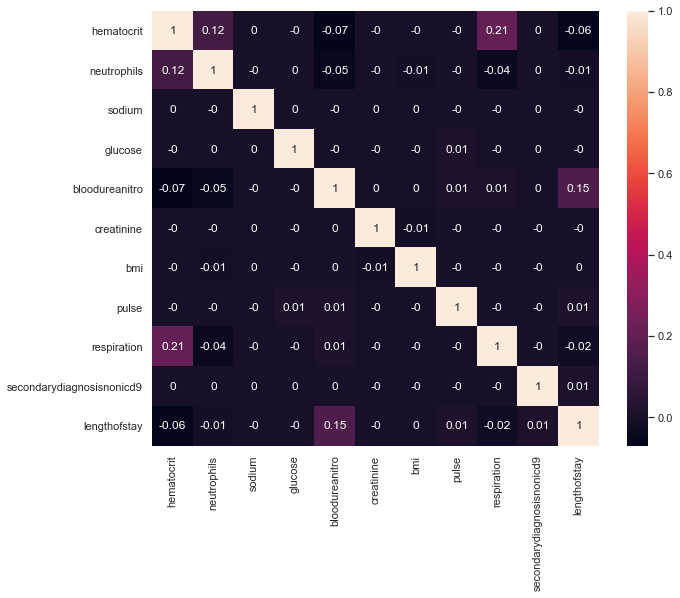

In [22]:
plt.subplots(figsize=(10,8))
sns.heatmap(np.round(lab_measurements.corr(), decimals=2), annot=True)

In [23]:
np.round(lab_measurements.corr(), decimals=2)

,hematocrit,neutrophils,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,lengthofstay
hematocrit,1.00,0.12,0.0,-0.00,-0.07,-0.00,-0.00,-0.00,0.21,0.00,-0.06
neutrophils,0.12,1.00,-0.0,0.00,-0.05,-0.00,-0.01,-0.00,-0.04,0.00,-0.01
sodium,0.00,-0.00,1.0,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00
glucose,-0.00,0.00,0.0,1.00,-0.00,-0.00,-0.00,0.01,-0.00,0.00,-0.00
bloodureanitro,-0.07,-0.05,-0.0,-0.00,1.00,0.00,0.00,0.01,0.01,0.00,0.15
creatinine,-0.00,-0.00,0.0,-0.00,0.00,1.00,-0.01,-0.00,-0.00,-0.00,-0.00
bmi,-0.00,-0.01,0.0,-0.00,0.00,-0.01,1.00,-0.00,-0.00,-0.00,0.00
pulse,-0.00,-0.00,-0.0,0.01,0.01,-0.00,-0.00,1.00,-0.00,-0.00,0.01
respiration,0.21,-0.04,-0.0,-0.00,0.01,-0.00,-0.00,-0.00,1.00,-0.00,-0.02
secondarydiagnosisnonicd9,0.00,0.00,0.0,0.00,0.00,-0.00,-0.00,-0.00,-0.00,1.00,0.01


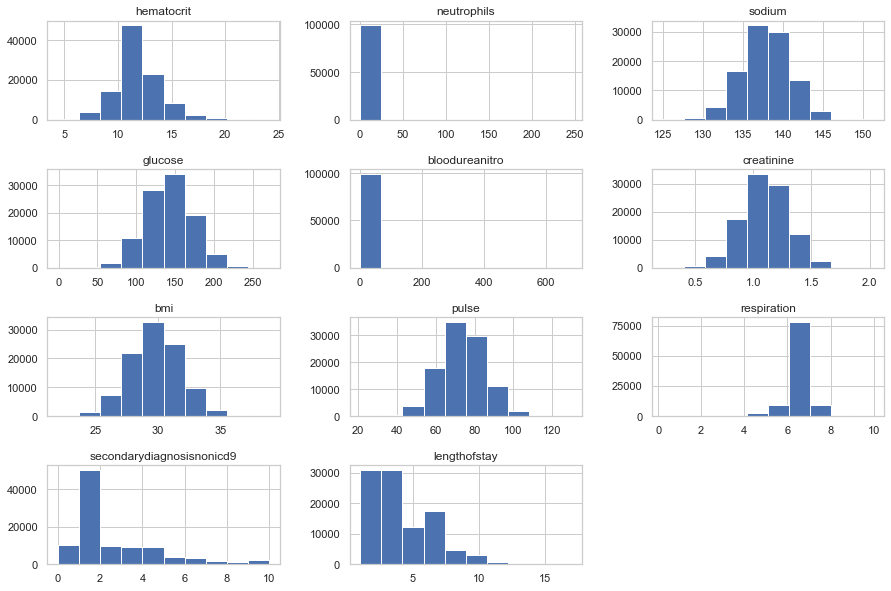

In [24]:
lab_measurements.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

## lenghtofstay vs lab_measurements

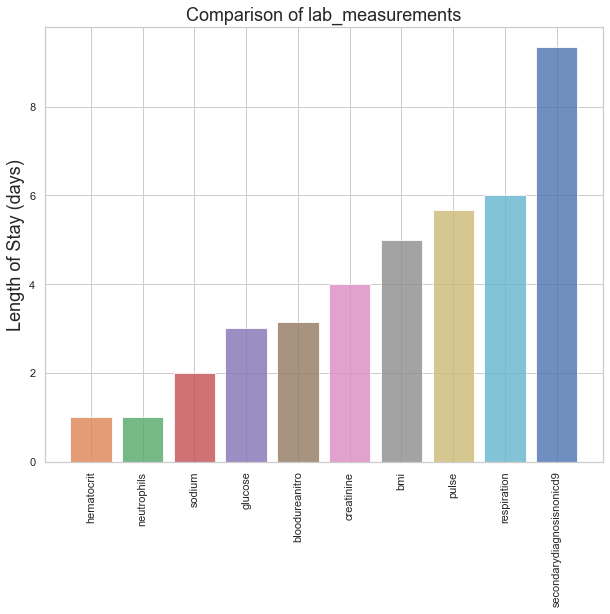

In [48]:
rcParams['figure.figsize']=10,8
lab_measurements_list=["hematocrit", "neutrophils", "sodium", "glucose", "bloodureanitro", "creatinine", "bmi", "pulse", "respiration","secondarydiagnosisnonicd9"]

results = []
for variable in lab_measurements_list:
    results.append(lab_measurements[[variable, 'lengthofstay']].groupby(variable).mean().reset_index().values[1][1])

fig, ax = plt.subplots()
ind = range(len(results))

ax.bar(ind, sorted(results), 
        align='center', 
        capsize=None, #10 
        color=['C01', 'C02', 'C03', 'C04', 'C05','C06', 'C07', 'C08', 'C09', 'C10']
        , alpha=0.8)

ax.set_ylabel('Length of Stay (days)', size=18)
ax.set_xticks(ind)
ax.set_xticklabels(lab_measurements_list, rotation = 90)
ax.set_title('Comparison of lab_measurements', size=18)
plt.show();

##  bloodureanitro 

Average blood urea nitrogen value during encounter (mg/dL)

In [26]:
lab_measurements.bloodureanitro.describe()

count    100000.000000
mean         14.097185
std          12.952454
min           1.000000
25%          11.000000
50%          12.000000
75%          14.000000
max         682.500000
Name: bloodureanitro, dtype: float64

Text(0.5, 1.0, 'LOS and bloodureanitro ')

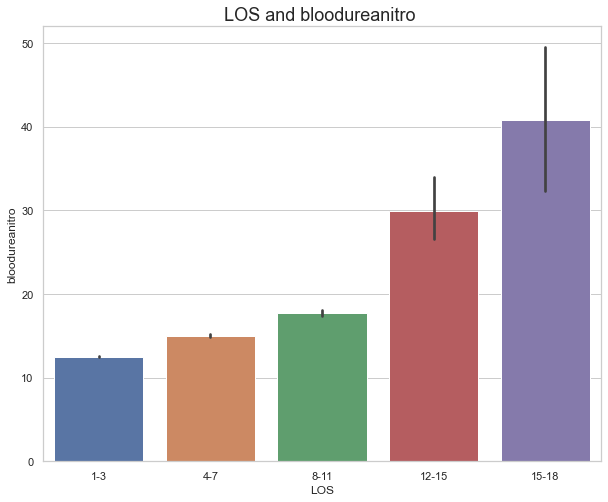

In [46]:
rcParams['figure.figsize']=10,8
#bivariate analysis for independent variable being a category and dependent variable being a number
sns.barplot(x="LOS", y="bloodureanitro", data=lab_measurements, capsize=None)
# mean value for each lengthofstay
plt.title('LOS and bloodureanitro ', size=18)


### Diagnoses ( Categorical Features )

In [28]:
issues=df[[ "hemo","dialysisrenalendstage","asthma","irondef","pneum","substancedependence","psychologicaldisordermajor","depress","psychother","fibrosisandother","malnutrition","lengthofstay","LOS"]]
issues

,hemo,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,fibrosisandother,malnutrition,lengthofstay,LOS
0,0,0,0,0,0,0,0,0,0,0,0,3,1-3
1,0,0,0,0,0,0,0,0,0,0,0,3,1-3
2,0,0,0,0,0,0,0,0,0,0,0,6,4-7
3,0,0,0,0,0,0,0,0,0,0,0,1,1-3
4,0,0,0,0,0,0,0,0,0,0,0,6,4-7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,0,0,0,0,0,0,0,0,0,1,3,1-3
99996,0,0,0,1,0,0,0,0,0,0,0,6,4-7
99997,0,0,0,0,0,0,0,0,0,0,1,3,1-3
99998,0,0,0,1,0,0,0,0,0,0,0,5,4-7


##  Correlation Heatmap of Diagnoses feartures

<AxesSubplot:>

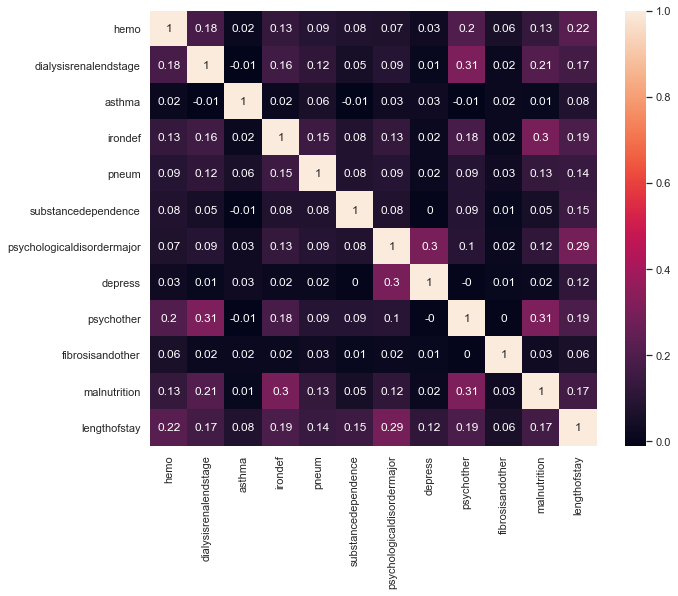

In [29]:
plt.subplots(figsize=(10,8))
sns.heatmap(np.round(issues.corr(), decimals=2), annot=True)

In [30]:
np.round(issues.corr(), decimals=2)

,hemo,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,fibrosisandother,malnutrition,lengthofstay
hemo,1.00,0.18,0.02,0.13,0.09,0.08,0.07,0.03,0.20,0.06,0.13,0.22
dialysisrenalendstage,0.18,1.00,-0.01,0.16,0.12,0.05,0.09,0.01,0.31,0.02,0.21,0.17
asthma,0.02,-0.01,1.00,0.02,0.06,-0.01,0.03,0.03,-0.01,0.02,0.01,0.08
irondef,0.13,0.16,0.02,1.00,0.15,0.08,0.13,0.02,0.18,0.02,0.30,0.19
pneum,0.09,0.12,0.06,0.15,1.00,0.08,0.09,0.02,0.09,0.03,0.13,0.14
substancedependence,0.08,0.05,-0.01,0.08,0.08,1.00,0.08,0.00,0.09,0.01,0.05,0.15
psychologicaldisordermajor,0.07,0.09,0.03,0.13,0.09,0.08,1.00,0.30,0.10,0.02,0.12,0.29
depress,0.03,0.01,0.03,0.02,0.02,0.00,0.30,1.00,-0.00,0.01,0.02,0.12
psychother,0.20,0.31,-0.01,0.18,0.09,0.09,0.10,-0.00,1.00,0.00,0.31,0.19
fibrosisandother,0.06,0.02,0.02,0.02,0.03,0.01,0.02,0.01,0.00,1.00,0.03,0.06


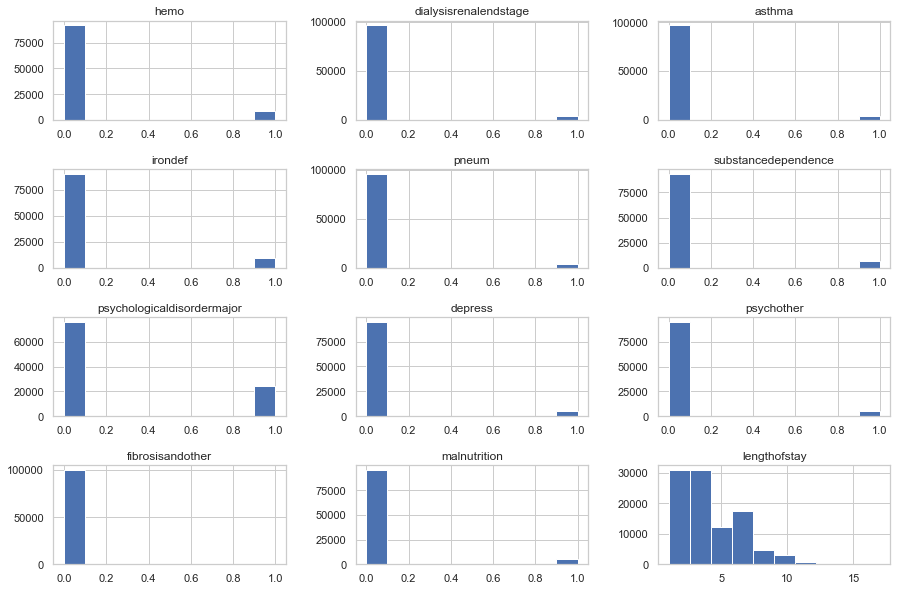

In [31]:
issues.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);
#fig.tight_layout(); 

### lenghtofstay vs Diagnoses

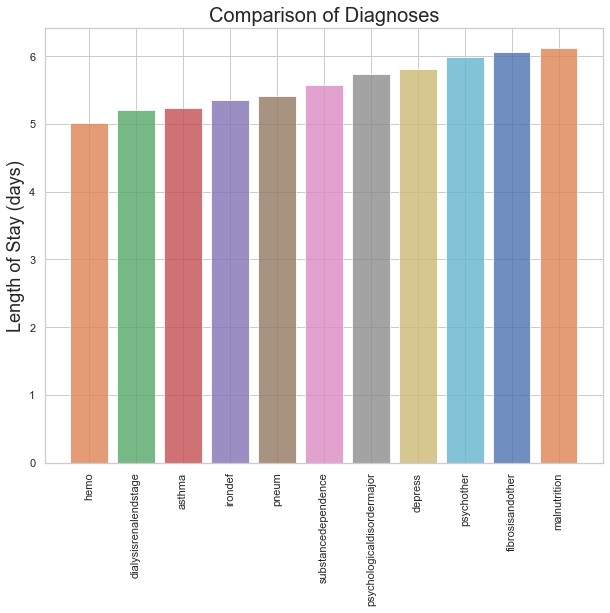

In [40]:
rcParams['figure.figsize']=10,8
issues_List=["hemo","dialysisrenalendstage","asthma","irondef","pneum","substancedependence","psychologicaldisordermajor","depress","psychother","fibrosisandother","malnutrition"]

results = []
for variable in issues_List:
    results.append(issues[[variable, 'lengthofstay']].groupby(variable).mean().reset_index().values[1][1])

fig, ax = plt.subplots()
ind = range(len(results))

ax.bar(ind, sorted(results), 
        align='center', 
        capsize=10, 
        color=['C01', 'C02', 'C03', 'C04', 'C05','C06', 'C07', 'C08', 'C09', 'C010']
        , alpha=0.8)

ax.set_xticks(ind)
ax.set_xticklabels(issues_List, rotation = 90)
ax.set_ylabel('Length of Stay (days)', size=18)
ax.tick_params(left=False, right=False, top=False) 
ax.set_title('Comparison of Diagnoses'.format(variable), size=20)

plt.show();

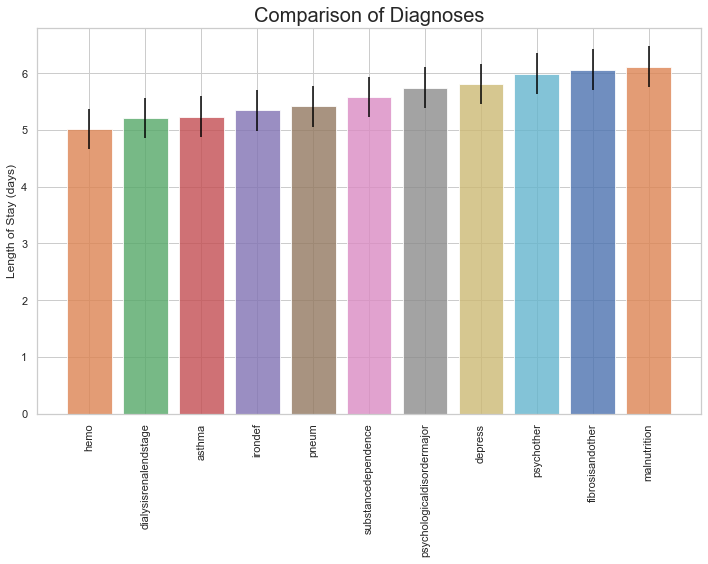

In [45]:
# Build the plot with error bars
rcParams['figure.figsize']=10,8
fig, ax = plt.subplots()
issues_List=["hemo","dialysisrenalendstage","asthma","irondef","pneum","substancedependence","psychologicaldisordermajor","depress","psychother","fibrosisandother","malnutrition"]


results = []
for variable in issues_List:
    results.append(issues[[variable, 'lengthofstay']].groupby(variable).mean().reset_index().values[1][1])
ind = range(len(results))
error=np.std(sorted(results))

ax.bar(ind, sorted(results),
           yerr=error,
           align='center',
           alpha=0.8,
           ecolor='black',
           capsize=None, #10
           color=['C01', 'C02', 'C03', 'C04', 'C05','C06', 'C07', 'C08', 'C09', 'C010'])
    
ax.set_ylabel('Length of Stay (days)')
ax.set_xticks(ind)
ax.set_xticklabels(issues_List, rotation = 90)
ax.set_title('Comparison of Diagnoses', size=20)
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()